In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

In [18]:
image = cv2.imread("./imgs/4.1.08.tiff")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# apply a gaussian blur to the image
image = cv2.GaussianBlur(image, (7, 7), 0)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [19]:
# Convert to B and W only img with a threshold of 127
ret,bw = cv2.threshold(image, 115, 255, cv2.THRESH_BINARY)

# add a border to the image
bw = cv2.copyMakeBorder(bw, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[255, 255, 255])
# invert the image
bw = cv2.bitwise_not(bw)
# convert to 0 and 1 values

In [20]:
# remove noise from the black and white image
kernel = np.ones((5,5),np.uint8)
bw = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# add a white border to the image
bw_inverted = cv2.bitwise_not(bw)

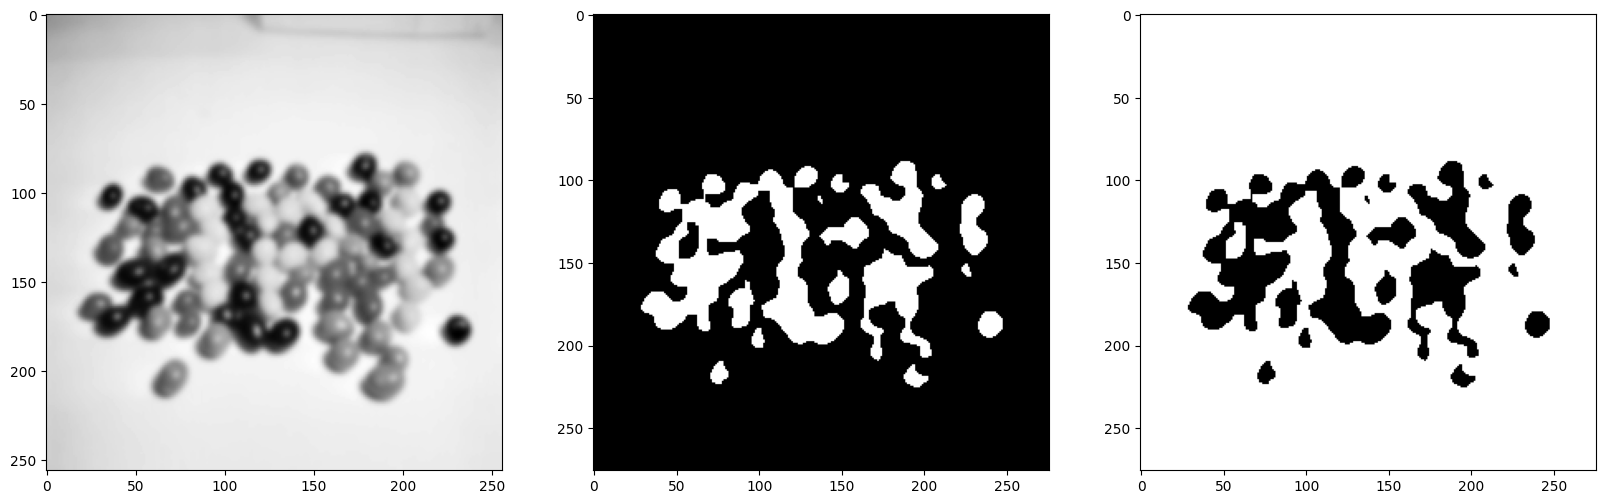

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(image, cmap="gray")
ax[1].imshow(bw, cmap="gray")
ax[2].imshow(bw_inverted, cmap="gray")
plt.show()

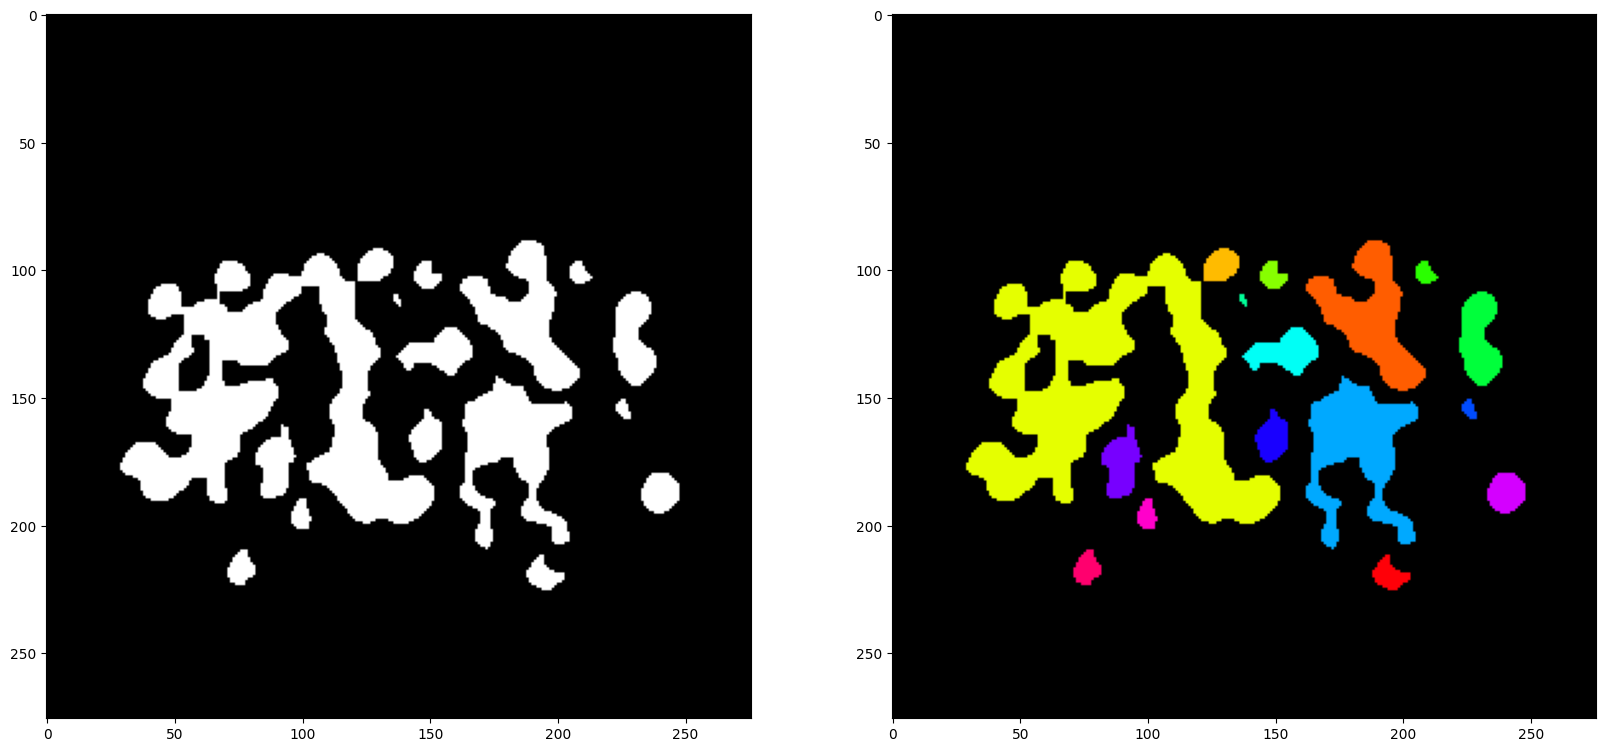

In [22]:
# Create a new image with random colors for each component
ret, labels = cv2.connectedComponents(bw)

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)

labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)

# set bg label to black
labeled_img[label_hue==0] = 0

img = cv2.cvtColor(bw, cv2.COLOR_GRAY2RGB)

ax , fig = plt.subplots(1, 2, figsize=(20, 10))
fig[0].imshow(img)
fig[1].imshow(labeled_img)
plt.show()
